### Data Loading, getting cuda

In [1]:
import torch
from data_loader import get_train_valid_loader

batch_size = 64
data_path = './data/train_labeled'
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

train_loader, valid_loader, test_loader, classes = get_train_valid_loader(data_path, batch_size)

### Net initialization

In [2]:
from nets.resnet_sm import ResNetSm

net = ResNetSm()
net.to(device)

ResNetSm(
  (begFilter): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Dropout2d(p=0.2, inplace=False)
  )
  (block1): Sequential(
    (0): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU()
    (6): Dropout2d(p=0.2, inplace=False)
  )
  (block2): Sequential(
    (0): Conv2d(64, 64

### Init net weights from file (optional)

In [ ]:
net_state_path = ''
net.load_state_dict(torch.load(net_state_path))

### Set seed (optional) 

In [8]:
import torch
seed = 0
torch.manual_seed(seed)

### Start training if you didn't load net state from file

In [ ]:
from train import train
import torch

print(f'Seed: {torch.initial_seed()}')

lr = 0.007
momentum = 0.9
num_epochs = 100
calc_train_acc = True
accs_valid, losses, accs_train = train(net, train_loader, valid_loader, num_epochs, lr, 
                                       momentum, device, calc_train_acc)
print('Finished Training')

Seed: 311737365141300


### Save net weights to file (optional)

In [4]:
save_path = './resnet-sm.pth'
torch.save(net.state_dict(), save_path)

### Evaluate on test set

In [5]:
net.eval()
from results import get_accuracy, get_accuracy_classes
print(f'accuracy on test set: {get_accuracy(net, test_loader, device)}')

classes_accuracy = get_accuracy_classes(net, test_loader, len(classes), device, batch_size)

for i in range(len(classes)):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], classes_accuracy[i]))

accuracy on test set: 84.65333333333334
Accuracy of airplane : 89 %
Accuracy of automobile : 94 %
Accuracy of  bird : 77 %
Accuracy of   cat : 59 %
Accuracy of  deer : 85 %
Accuracy of   dog : 78 %
Accuracy of  frog : 92 %
Accuracy of horse : 87 %
Accuracy of  ship : 89 %
Accuracy of truck : 92 %


### Plot accuracies

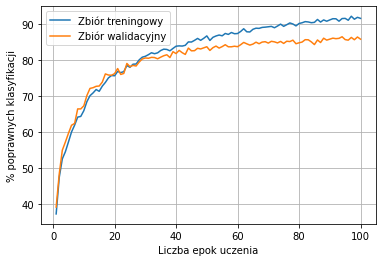

In [6]:
from graph_creator import draw_accuracy_train_valid
draw_accuracy_train_valid(accs_valid, accs_train)


### Plot loss

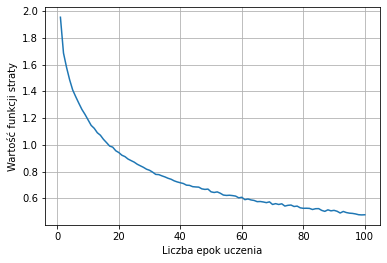

In [7]:
from graph_creator import draw_loss
draw_loss(losses)

### Plot classes accuracies

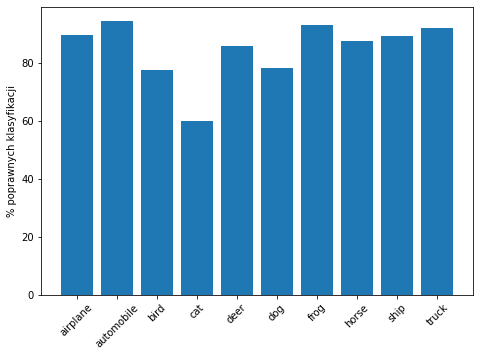

In [8]:
from graph_creator import draw_accuracies_classes
draw_accuracies_classes(classes, classes_accuracy)

In [4]:
from nets.resnet_sm import ResNetSm
import torch
from train import train
from results import get_accuracy, get_accuracy_classes



for i in range(5):

    net = ResNetSm()
    net.to(device)
    print(f'Seed: {torch.seed()}')

    lr = 0.007
    momentum = 0.9
    num_epochs = 100
    calc_train_acc = True
    accs_valid, losses, accs_train = train(net, train_loader, valid_loader, num_epochs, lr, 
                                           momentum, device, calc_train_acc)
    print('Finished Training')
    net.eval()
    from results import get_accuracy, get_accuracy_classes
    print(f'accuracy on test set: {get_accuracy(net, test_loader, device)}')

    classes_accuracy = get_accuracy_classes(net, test_loader, len(classes), device, batch_size)

Seed: 246844254371600
epoch 1, valid  accuracy 39.17333333333333, train accuracy 38.41428571428571, loss 1.9446539628222395
epoch 2, valid  accuracy 49.16, train accuracy 48.13428571428572, loss 1.704502450264786
epoch 3, valid  accuracy 51.84, train accuracy 50.44, loss 1.5979224835714867
epoch 4, valid  accuracy 55.946666666666665, train accuracy 54.674285714285716, loss 1.4969122361875322
epoch 5, valid  accuracy 59.266666666666666, train accuracy 57.26, loss 1.4393964190805635
epoch 6, valid  accuracy 61.946666666666665, train accuracy 59.808571428571426, loss 1.3775492793245332
epoch 7, valid  accuracy 62.74666666666667, train accuracy 60.68571428571428, loss 1.3229745769195627
epoch 8, valid  accuracy 65.50666666666666, train accuracy 63.205714285714286, loss 1.2798036772764578
epoch 9, valid  accuracy 66.41333333333333, train accuracy 64.71428571428571, loss 1.2273426015590618
epoch 10, valid  accuracy 68.49333333333334, train accuracy 67.22, loss 1.1919005591647063
epoch 11, va

epoch 85, valid  accuracy 85.28, train accuracy 90.80571428571429, loss 0.5073062779153723
epoch 86, valid  accuracy 85.42666666666666, train accuracy 91.04857142857144, loss 0.5056219922014302
epoch 87, valid  accuracy 86.02666666666667, train accuracy 91.24285714285715, loss 0.4996636576092439
epoch 88, valid  accuracy 85.78666666666666, train accuracy 91.35142857142857, loss 0.5043299361327884
epoch 89, valid  accuracy 85.74666666666667, train accuracy 91.35428571428571, loss 0.492751900385895
epoch 90, valid  accuracy 85.78666666666666, train accuracy 91.47428571428571, loss 0.4911882287568976
epoch 91, valid  accuracy 86.28, train accuracy 91.94, loss 0.4873259417862517
epoch 92, valid  accuracy 85.38666666666667, train accuracy 90.77714285714286, loss 0.4858078677922324
epoch 93, valid  accuracy 85.73333333333333, train accuracy 91.31714285714285, loss 0.4865959601602781
epoch 94, valid  accuracy 86.14666666666666, train accuracy 91.67714285714285, loss 0.4824352620452152
epoch 9

epoch 71, valid  accuracy 85.06666666666666, train accuracy 89.08285714285714, loss 0.5707041546566177
epoch 72, valid  accuracy 84.26666666666667, train accuracy 88.82857142857142, loss 0.5483586313083795
epoch 73, valid  accuracy 84.81333333333333, train accuracy 89.59142857142857, loss 0.5585673256918543
epoch 74, valid  accuracy 84.73333333333333, train accuracy 89.33428571428571, loss 0.5455050808147713
epoch 75, valid  accuracy 84.29333333333334, train accuracy 89.54571428571428, loss 0.5540757997325831
epoch 76, valid  accuracy 85.17333333333333, train accuracy 89.75142857142858, loss 0.5413629631401198
epoch 77, valid  accuracy 85.24, train accuracy 89.66285714285715, loss 0.549941501272008
epoch 78, valid  accuracy 84.56, train accuracy 89.75428571428571, loss 0.5384915856000928
epoch 79, valid  accuracy 85.14666666666666, train accuracy 90.28285714285714, loss 0.5421064972223704
epoch 80, valid  accuracy 85.02666666666667, train accuracy 90.58857142857143, loss 0.528488376404

epoch 55, valid  accuracy 83.49333333333334, train accuracy 86.45428571428572, loss 0.6314646389192375
epoch 56, valid  accuracy 83.45333333333333, train accuracy 86.62285714285714, loss 0.6091155566179774
epoch 57, valid  accuracy 83.08, train accuracy 86.16285714285715, loss 0.6131020278773752
epoch 58, valid  accuracy 82.94666666666667, train accuracy 86.19428571428571, loss 0.6148308169580247
epoch 59, valid  accuracy 83.21333333333334, train accuracy 87.22285714285714, loss 0.6128899628327141
epoch 60, valid  accuracy 84.25333333333333, train accuracy 88.15428571428572, loss 0.6044790916403643
epoch 61, valid  accuracy 83.77333333333333, train accuracy 87.34285714285714, loss 0.6082750828000266
epoch 62, valid  accuracy 83.90666666666667, train accuracy 87.85714285714286, loss 0.5894137595318789
epoch 63, valid  accuracy 84.42666666666666, train accuracy 88.07428571428571, loss 0.5933922023616282
epoch 64, valid  accuracy 85.0, train accuracy 88.83142857142857, loss 0.588623001381

epoch 39, valid  accuracy 81.54666666666667, train accuracy 83.81428571428572, loss 0.7259151187522755
epoch 40, valid  accuracy 81.50666666666666, train accuracy 83.84857142857143, loss 0.7170453634950753
epoch 41, valid  accuracy 81.78666666666666, train accuracy 84.19428571428571, loss 0.7029462305784662
epoch 42, valid  accuracy 82.81333333333333, train accuracy 84.47714285714285, loss 0.7050797397192479
epoch 43, valid  accuracy 82.0, train accuracy 84.76571428571428, loss 0.6941694887508204
epoch 44, valid  accuracy 82.41333333333333, train accuracy 85.39428571428572, loss 0.6859690991027699
epoch 45, valid  accuracy 82.02666666666667, train accuracy 84.73714285714286, loss 0.6801347030255215
epoch 46, valid  accuracy 82.18666666666667, train accuracy 85.25142857142858, loss 0.672524957323423
epoch 47, valid  accuracy 82.68, train accuracy 85.68, loss 0.6597765589327002
epoch 48, valid  accuracy 83.16, train accuracy 85.95428571428572, loss 0.6646769206964119
epoch 49, valid  acc

epoch 23, valid  accuracy 78.56, train accuracy 77.70857142857143, loss 0.9134253138706933
epoch 24, valid  accuracy 78.21333333333334, train accuracy 77.9, loss 0.8959932742432659
epoch 25, valid  accuracy 78.04, train accuracy 78.32285714285715, loss 0.8809251848478857
epoch 26, valid  accuracy 78.42666666666666, train accuracy 79.14285714285714, loss 0.875936865915546
epoch 27, valid  accuracy 78.45333333333333, train accuracy 79.46, loss 0.8529076181774383
epoch 28, valid  accuracy 79.24, train accuracy 79.35714285714286, loss 0.8443327569002643
epoch 29, valid  accuracy 79.4, train accuracy 79.77714285714286, loss 0.8250177113077104
epoch 30, valid  accuracy 79.6, train accuracy 80.66, loss 0.8177599103838695
epoch 31, valid  accuracy 79.72, train accuracy 79.82857142857142, loss 0.8068989296826845
epoch 32, valid  accuracy 80.14666666666666, train accuracy 81.64285714285714, loss 0.7985001691843517
epoch 33, valid  accuracy 80.28, train accuracy 82.10857142857142, loss 0.78010558